# Create Figure 7 which plots the experiments with (a) unequal stratification; (b) wind
Here, we load in the needed numerical solutions and the analytic solutions which were computed in analytic_unequalstratification.ipynb and analytic_wind.ipynb,

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import copy
from matplotlib import rcParams

In [2]:
# Necessary grid definitions
ny=129
wbc=12
last=ny-ny//7

### LOAD FROM WIND
# Load in top pert. Numerical
h2=xr.open_dataset("./output_files/h2_xr_control_years600to675_toplayerpert_wind_fix_northofsponge_nohdamp_sealevel_tunedtomitgcm_nu8e3_dt250_rk4_nohdiffusion_noslip_properimplement_update_onlycorners_nonlinear_H1_250_H2_250_delta_rho2_mitdomainsize_mod.nc")
h2_xr_top_wind=(h2.to_array()).squeeze()

h1=xr.open_dataset("./output_files/h1_xr_control_years600to675_toplayerpert_wind_fix_northofsponge_nohdamp_sealevel_tunedtomitgcm_nu8e3_dt250_rk4_nohdiffusion_noslip_properimplement_update_onlycorners_nonlinear_H1_250_H2_250_delta_rho2_mitdomainsize_mod.nc")
h1_xr_top_wind=(h1.to_array()).squeeze()
#Load in bottom pert. Numerical
h2=xr.open_dataset("./output_files/h2_xr_control_years600to675_bottomlayerpert_wind_fix_northofsponge_nohdamp_sealevel_tunedtomitgcm_nu8e3_dt250_rk4_nohdiffusion_noslip_properimplement_update_onlycorners_nonlinear_H1_250_H2_250_delta_rho2_mitdomainsize_mod.nc")
h2_xr_bottom_wind=(h2.to_array()).squeeze()

h1=xr.open_dataset("./output_files/h1_xr_control_years600to675_bottomlayerpert_wind_fix_northofsponge_nohdamp_sealevel_tunedtomitgcm_nu8e3_dt250_rk4_nohdiffusion_noslip_properimplement_update_onlycorners_nonlinear_H1_250_H2_250_delta_rho2_mitdomainsize_mod.nc")
h1_xr_bottom_wind=(h1.to_array()).squeeze()

#Load in top pert. Analytic
h1_pred_toppert_time=np.load('./intermediate_files_cleaned/pred_h1_toppert_grid_time_250m_matchmitgcminput_wind_longerspinup_revisions.npy')
h2_pred_toppert_time=np.load('./intermediate_files_cleaned/pred_h2_toppert_grid_time_250m_matchmitgcminput_wind_longerspinup_revisions.npy')

#Load in bottom pert. Analytic
h1_pred_bottompert_time=np.load('./intermediate_files_cleaned/pred_h1_bottompert_grid_time_250m_matchmitgcminput_wind_longerspinup_revisions.npy')
h2_pred_bottompert_time=np.load('./intermediate_files_cleaned/pred_h2_bottompert_grid_time_250m_matchmitgcminput_wind_longerspinup_revisions.npy')

#convert these all to xarrays
h1_pred_toppert_time_wind=xr.DataArray(h1_pred_toppert_time, coords={'y': h1_xr_top_wind.y[30:],'x':  h1_xr_top_wind.x[wbc:], 'time': h1_xr_bottom_wind.time[::11]}, dims=["y", "x",'time']) #convert to an xarray 
h2_pred_toppert_time_wind=xr.DataArray(h2_pred_toppert_time, coords={'y': h1_xr_top_wind.y[30:],'x':  h1_xr_top_wind.x[wbc:], 'time': h1_xr_bottom_wind.time[::11]}, dims=["y", "x","time"]) #convert to an xarray 

h1_pred_bottompert_time_wind=xr.DataArray(h1_pred_bottompert_time, coords={'y': h1_xr_top_wind.y[30:],'x':  h1_xr_top_wind.x[wbc:], 'time': h1_xr_bottom_wind.time[::11]}, dims=["y", "x",'time']) #convert to an xarray 
h2_pred_bottompert_time_wind=xr.DataArray(h2_pred_bottompert_time, coords={'y': h1_xr_top_wind.y[30:],'x':  h1_xr_top_wind.x[wbc:], 'time': h1_xr_bottom_wind.time[::11]}, dims=["y", "x","time"]) #convert to an xarray 

In [3]:
### LOAD FROM UNEQUAL STRATIFICATION
# Load in top pert. Numerical
h2=xr.open_dataset("./output_files/h2_xr_control_years0to75_toplayerpert_fix_fromstationary_northofsponge_nohdamp_sealevel_tunedtomitgcm_nu8e3_dt250_rk4_nohdiffusion_noslip_properimplement_update_onlycorners_nonlinear_H1_250_H2_250_g1is2g2_mitdomainsize_mod_smallerstrat.nc")
h2_xr_top=(h2.to_array()).squeeze()
h1=xr.open_dataset("./output_files/h1_xr_control_years0to75_toplayerpert_fix_fromstationary_northofsponge_nohdamp_sealevel_tunedtomitgcm_nu8e3_dt250_rk4_nohdiffusion_noslip_properimplement_update_onlycorners_nonlinear_H1_250_H2_250_g1is2g2_mitdomainsize_mod_smallerstrat.nc")
h1_xr_top=(h1.to_array()).squeeze()

# Load in bottom pert. Numerical
h2=xr.open_dataset("./output_files/h2_xr_control_years0to75_bottomlayerpert_fix_fromstationary_northofsponge_nohdamp_sealevel_tunedtomitgcm_nu8e3_dt250_rk4_nohdiffusion_noslip_properimplement_update_onlycorners_nonlinear_H1_250_H2_250_g1is2g2_mitdomainsize_mod_smallerstrat.nc")
h2_xr_bottom=(h2.to_array()).squeeze()
h1=xr.open_dataset("./output_files/h1_xr_control_years0to75_bottomlayerpert_fix_fromstationary_northofsponge_nohdamp_sealevel_tunedtomitgcm_nu8e3_dt250_rk4_nohdiffusion_noslip_properimplement_update_onlycorners_nonlinear_H1_250_H2_250_g1is2g2_mitdomainsize_mod_smallerstrat.nc")
h1_xr_bottom=(h1.to_array()).squeeze()

#Load in top pert. Analytic
h1_pred_toppert_time=np.load('./intermediate_files_cleaned/pred_h1_toppert_grid_time_250m_matchmitgcminput_g1equal2g2_revisions_update.npy')
h2_pred_toppert_time=np.load('./intermediate_files_cleaned/pred_h2_toppert_grid_time_250m_matchmitgcminput_g1equal2g2_revisions_update.npy')

#Load in bottom pert. Analytic
h1_pred_bottompert_time=np.load('./intermediate_files_cleaned/pred_h1_bottompert_grid_time_250m_matchmitgcminput_g1equal2g2_revisions_update.npy')
h2_pred_bottompert_time=np.load('./intermediate_files_cleaned/pred_h2_bottompert_grid_time_250m_matchmitgcminput_g1equal2g2_revisions_update.npy')

#convert these all to xarrays
h1_pred_toppert_time=xr.DataArray(h1_pred_toppert_time, coords={'y': h1_xr_top.y[30:],'x':  h1_xr_top.x[wbc:], 'time': h1_xr_bottom.time}, dims=["y", "x",'time']) #convert to an xarray 
h2_pred_toppert_time=xr.DataArray(h2_pred_toppert_time, coords={'y': h1_xr_top.y[30:],'x':  h1_xr_top.x[wbc:], 'time': h1_xr_bottom.time}, dims=["y", "x","time"]) #convert to an xarray 

h1_pred_bottompert_time=xr.DataArray(h1_pred_bottompert_time, coords={'y': h1_xr_top.y[30:],'x':  h1_xr_top.x[wbc:], 'time': h1_xr_bottom.time}, dims=["y", "x",'time']) #convert to an xarray 
h2_pred_bottompert_time=xr.DataArray(h2_pred_bottompert_time, coords={'y': h1_xr_top.y[30:],'x':  h1_xr_top.x[wbc:], 'time': h1_xr_bottom.time}, dims=["y", "x","time"]) #convert to an xarray 

Text(0.5, 1.09, 'Change in Northern Hemisphere anomaly \n of upper ocean thickness')

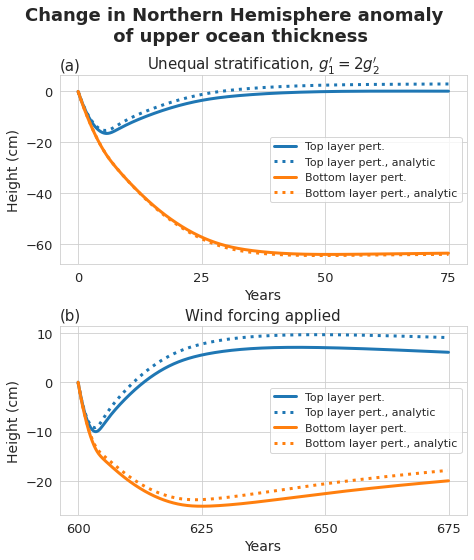

In [4]:
import seaborn as sns
sns.set_style(style="whitegrid") #comment out if don't want seaborn background


scaling=1 #use 1 if half width plot once put into latex. use 1/2 if full width once put into latex

rcParams.update({
    'font.size': 10 * scaling,
    'axes.titlesize': 15 * scaling,
    'axes.labelsize': 14 * scaling,
    'xtick.labelsize': 13 * scaling,
    'ytick.labelsize': 13 * scaling,
    'legend.fontsize': 11 * scaling,
})

fig,(ax,ax2)=plt.subplots(nrows=2,ncols=1,figsize=(6.47,10.5*(2/3)), constrained_layout=True)
sum_top=h1_xr_top+h2_xr_top
sum_top_analytic=h1_pred_toppert_time+h2_pred_toppert_time


sum_bottom=h1_xr_bottom+h2_xr_bottom
sum_bottom_analytic=h1_pred_bottompert_time+h2_pred_bottompert_time


ax.plot(sum_bottom.time/360,100*(sum_top[30:int(last),:,:].where(sum_top.y>0).mean('x').mean('y')-sum_top.mean('x').mean('y')),label='Top layer pert.',lw=3)
ax.plot(sum_top_analytic.time/360,100*(sum_top_analytic[:-ny//7+1,:,:].where(sum_top_analytic.y>0).mean('x').mean('y')-sum_top.mean('x').mean('y')),color='tab:blue',lw=3,linestyle='dotted',label='Top layer pert., analytic')
ax.plot(sum_bottom.time/360,100*(sum_bottom[30:int(last),:,:].where(sum_bottom.y>0).mean('x').mean('y')-sum_bottom.mean('x').mean('y')),label='Bottom layer pert.',lw=3)
ax.plot(sum_bottom_analytic.time/360,100*(sum_bottom_analytic[:-ny//7+1,:,:].where(sum_bottom_analytic.y>0).mean('x').mean('y')-sum_bottom.mean('x').mean('y')),lw=3,color='tab:orange',linestyle='dotted',label='Bottom layer pert., analytic')

ax.set_ylabel('Height (cm)')
ax.set_xlabel('Years')
ax.legend()
ax.set_title(r'Unequal stratification, $g_1^\prime =2g_2^\prime$')
ax.set_title('(a)',loc='left')
ax.set_xticks(np.arange(0, 76, 25))  # Show x-ticks every 25 years

ax.set_xticklabels([f"{int(year)}" for year in np.arange(0, 76, 25)])




###### wind
sum_top=h1_xr_top_wind+h2_xr_top_wind
sum_top_analytic=h1_pred_toppert_time_wind+h2_pred_toppert_time_wind


sum_bottom=h1_xr_bottom_wind+h2_xr_bottom_wind
sum_bottom_analytic=h1_pred_bottompert_time_wind+h2_pred_bottompert_time_wind

#needed because wind experiment doesn't begin from a fully rested state (has a spatial pattern to begin with)
offset_toplayer=100*(sum_top[30:int(last),:,:].where(sum_top.y>0).mean('x').mean('y')-sum_top.mean('x').mean('y'))[0]
offset_bottomlayer=100*(sum_bottom[30:int(last),:,:].where(sum_bottom.y>0).mean('x').mean('y')-sum_bottom.mean('x').mean('y'))[0]


ax2.plot(sum_bottom.time/360,100*(sum_top[30:int(last),:,:].where(sum_top.y>0).mean('x').mean('y')-sum_top.mean('x').mean('y'))-offset_toplayer,label='Top layer pert.',lw=3)
ax2.plot(sum_top_analytic.time/360,100*(sum_top_analytic[:-ny//7+1,:,:].where(sum_top_analytic.y>0).mean('x').mean('y')-sum_top.mean('x').mean('y'))-offset_toplayer,color='tab:blue',linestyle='dotted',label='Top layer pert., analytic',lw=3)
ax2.plot(sum_bottom.time/360,100*(sum_bottom[30:int(last),:,:].where(sum_bottom.y>0).mean('x').mean('y')-sum_bottom.mean('x').mean('y'))-offset_bottomlayer,label='Bottom layer pert.',lw=3)
ax2.plot(sum_bottom_analytic.time/360,100*(sum_bottom_analytic[:-ny//7+1,:,:].where(sum_bottom_analytic.y>0).mean('x').mean('y')-sum_bottom.mean('x').mean('y'))-offset_bottomlayer,color='tab:orange',linestyle='dotted',label='Bottom layer pert., analytic',lw=3)

ax2.set_ylabel('Height (cm)')
ax2.set_xlabel('Years')
ax2.legend()
ax2.set_title('Wind forcing applied')
ax2.set_title('(b)',loc='left')
ax2.set_xticks(np.arange(600, 676, 25))  # Show x-ticks every 25 years
ax2.set_xticklabels([f"{int(year)}" for year in np.arange(600, 676, 25)])


fig.suptitle('Change in Northern Hemisphere anomaly \n of upper ocean thickness', fontsize=18*scaling, y=1.09, fontweight='bold')

#import matplotlib
#plt.savefig('fig7.pdf',dpi=1000,bbox_inches='tight')